<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

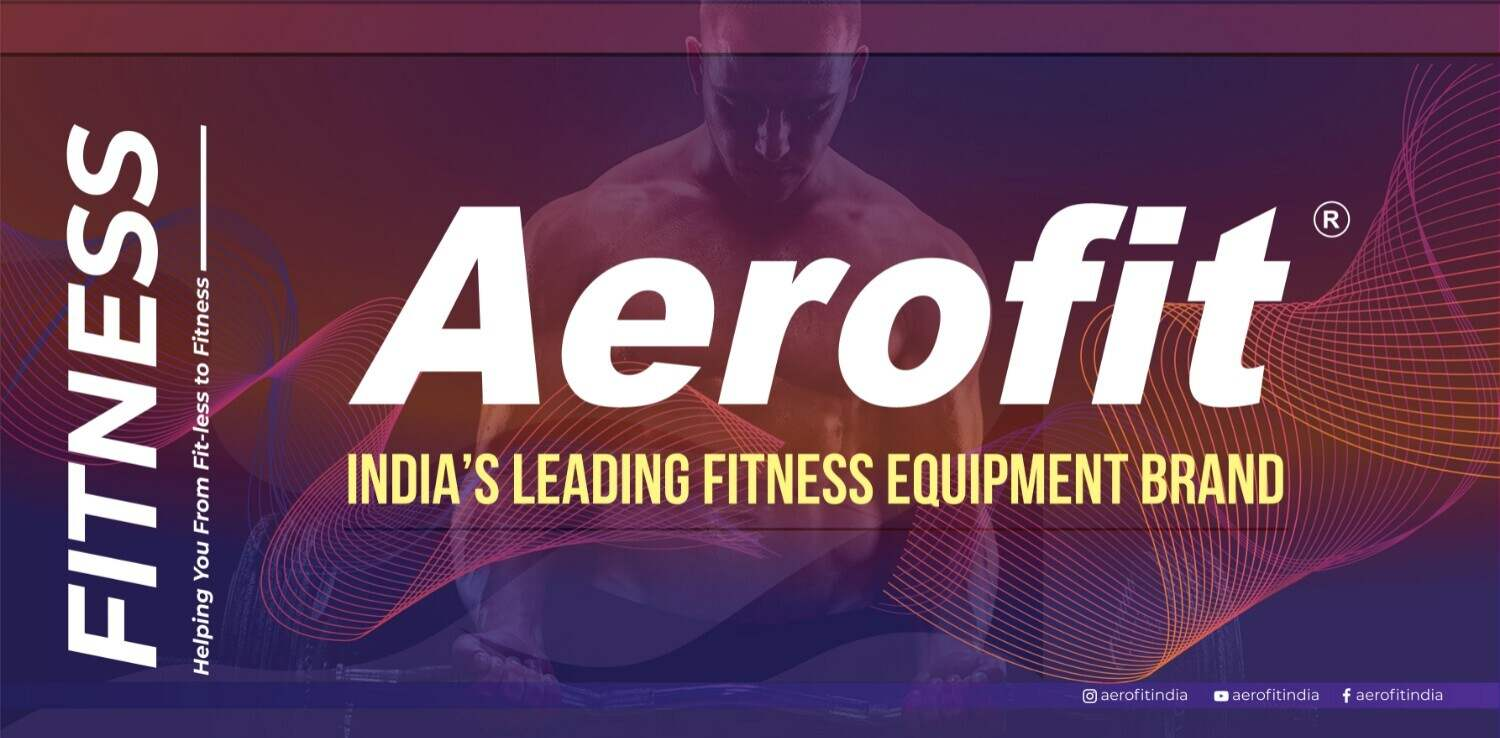

# **Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")
dataC = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")

In [83]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [85]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [86]:
data.index

RangeIndex(start=0, stop=180, step=1)

In [87]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [88]:
print ("Category : Nunique , Max , Min")
print("-------------------------------")
for i in data.columns:
  print(i, ":", data[i].nunique(),",", data[i].max(),",",data[i].min())

Category : Nunique , Max , Min
-------------------------------
Product : 3 , KP781 , KP281
Age : 32 , 50 , 18
Gender : 2 , Male , Female
Education : 8 , 21 , 12
MaritalStatus : 2 , Single , Partnered
Usage : 6 , 7 , 2
Fitness : 5 , 5 , 1
Income : 62 , 104581 , 29562
Miles : 37 , 360 , 21


In [89]:
for i in data.columns:
  print(i , data[i].min(), data[i].max())

Product KP281 KP781
Age 18 50
Gender Female Male
Education 12 21
MaritalStatus Partnered Single
Usage 2 7
Fitness 1 5
Income 29562 104581
Miles 21 360


In [90]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [91]:
data.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [92]:
data.corr()

<ipython-input-92-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-93-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


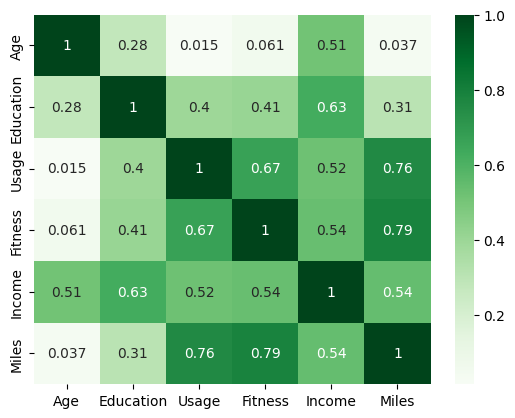

In [93]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

<Axes: xlabel='count', ylabel='Product'>

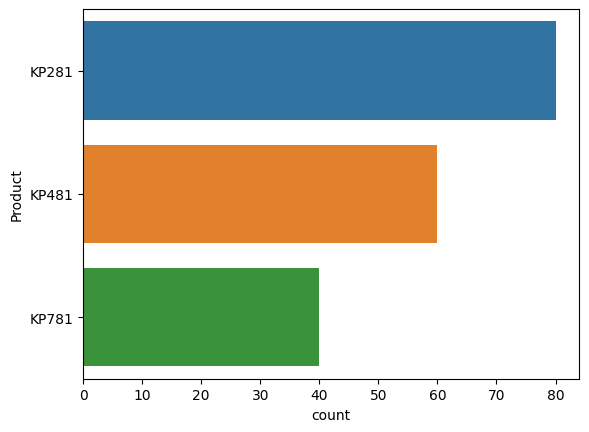

In [94]:
sns.countplot(data=data, y = "Product")

<Axes: xlabel='count', ylabel='Gender'>

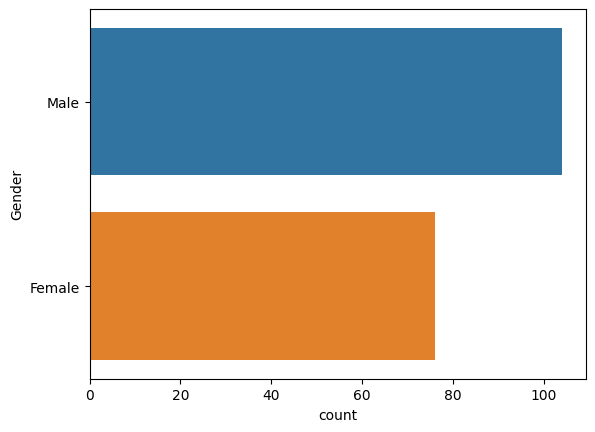

In [95]:
sns.countplot(data=data,y="Gender")

<Axes: xlabel='count', ylabel='Gender'>

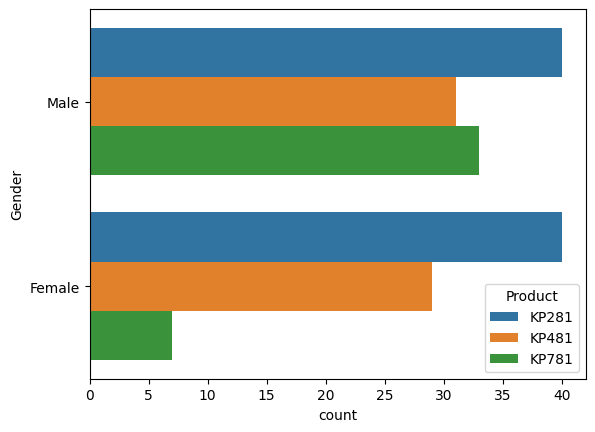

In [96]:
sns.countplot(data=data,y="Gender",hue= "Product")

<Axes: xlabel='count', ylabel='Education'>

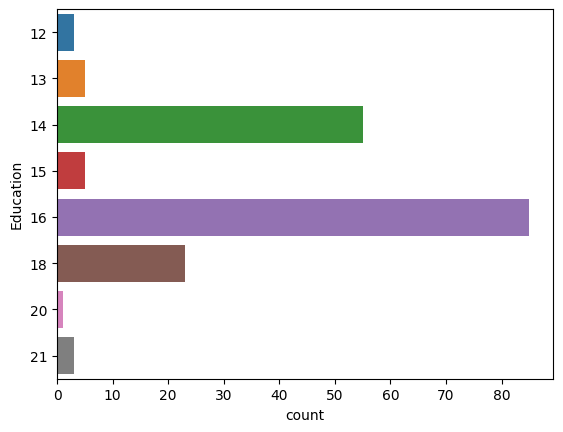

In [97]:
sns.countplot(data=data, y="Education")

In [98]:
dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[1,2,3,4,5],right = True)

<Axes: xlabel='count', ylabel='Education'>

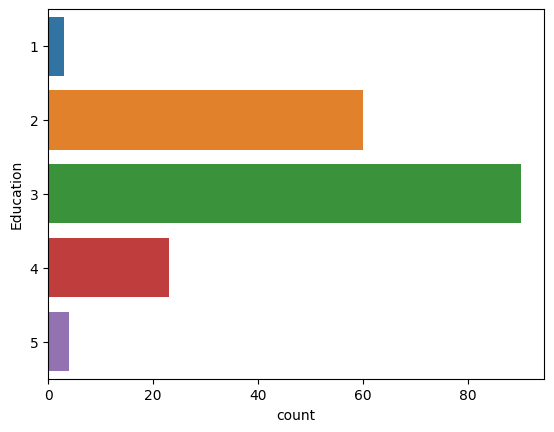

In [99]:
sns.countplot(data=dataC, y="Education")

<Axes: xlabel='count', ylabel='Education'>

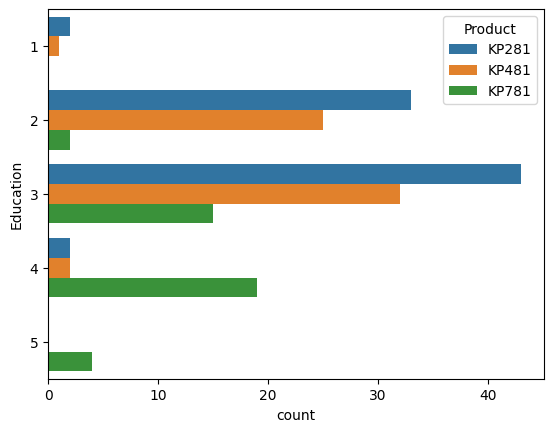

In [100]:
sns.countplot(data=dataC, y="Education", hue = "Product")

<Axes: xlabel='Age', ylabel='Count'>

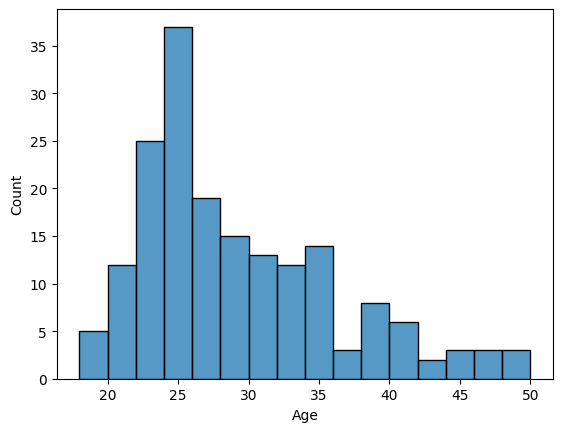

In [101]:
sns.histplot(data["Age"], bins = 16)

In [102]:
dataC["Age"] = pd.cut(data["Age"],bins=[10,20,30,40,50],labels=["Tens","Twenties","Thirties","Fourties"],right = True)

<Axes: xlabel='Age', ylabel='Density'>

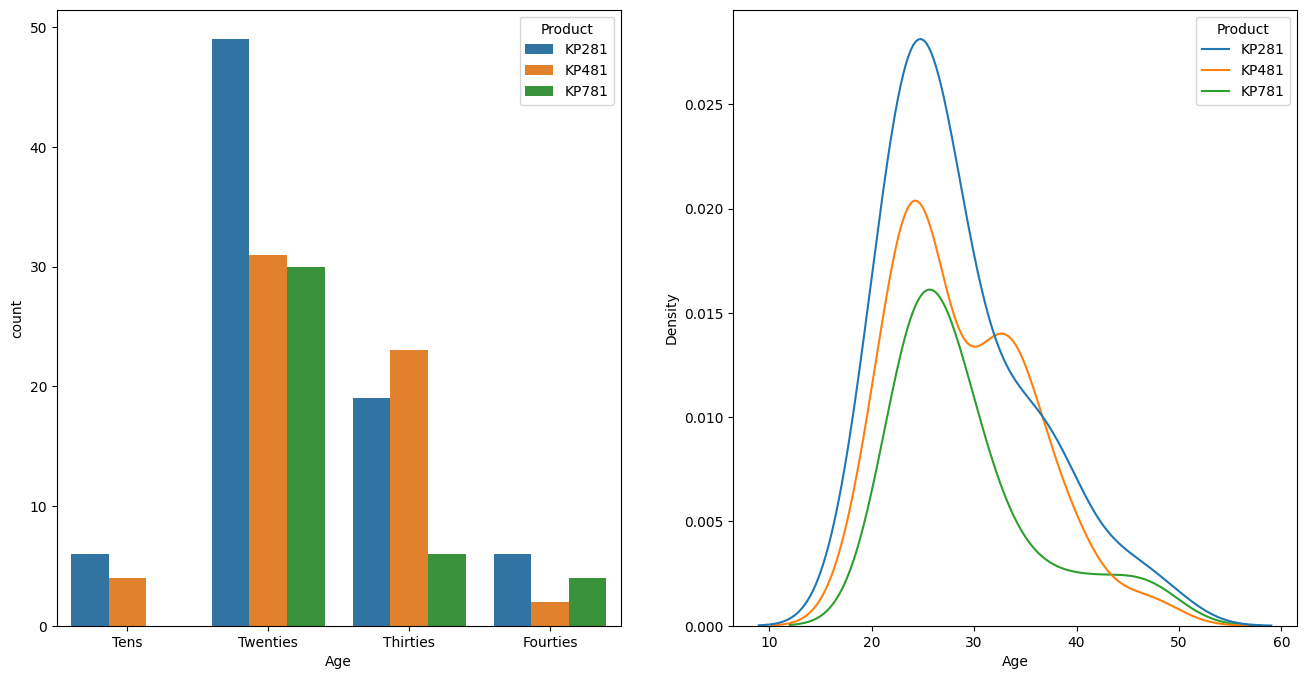

In [103]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC, x="Age", hue = "Product")
plt.subplot(1,2,2)
sns.kdeplot(data= data, x=data["Age"],hue="Product")

<Axes: xlabel='MaritalStatus', ylabel='count'>

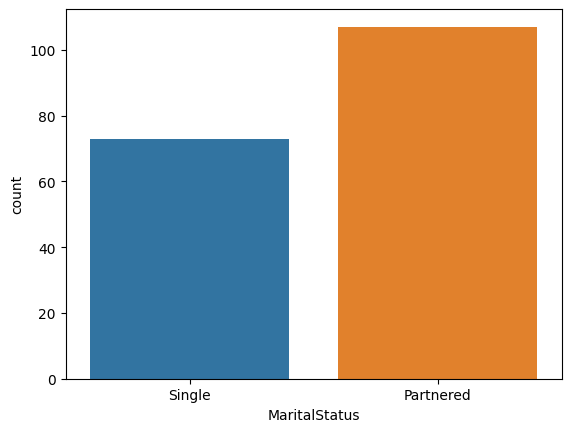

In [104]:
sns.countplot(data=data, x="MaritalStatus")

<Axes: xlabel='MaritalStatus', ylabel='count'>

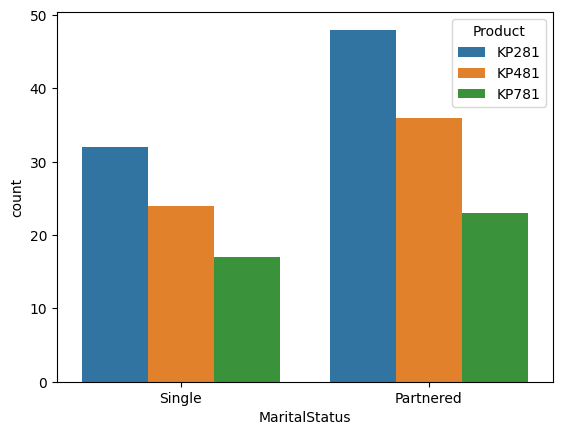

In [105]:
sns.countplot(data=data, x="MaritalStatus", hue= "Product")

<Axes: xlabel='Usage', ylabel='count'>

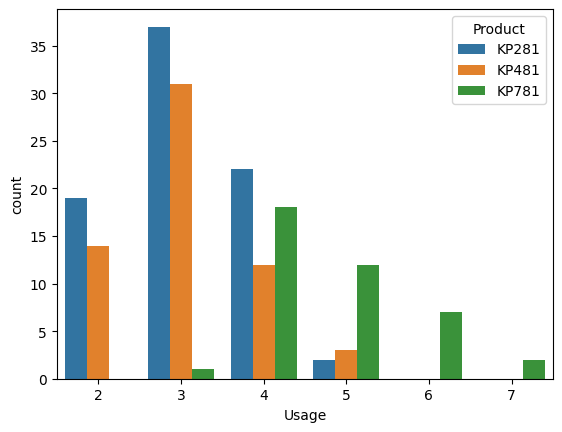

In [106]:
sns.countplot(data=data,x="Usage",hue="Product")

<Axes: xlabel='Fitness', ylabel='count'>

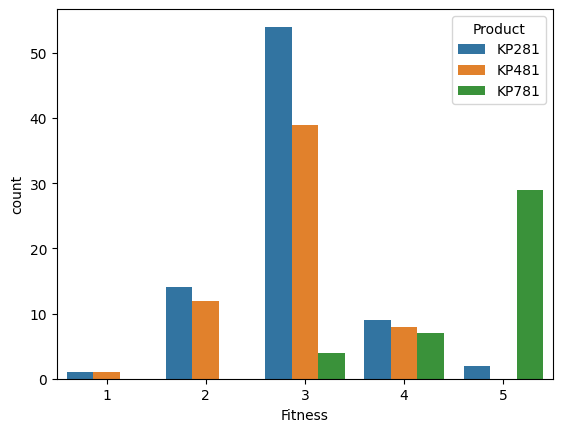

In [107]:
sns.countplot(data=data,x="Fitness",hue="Product")

<Axes: xlabel='Income', ylabel='Count'>

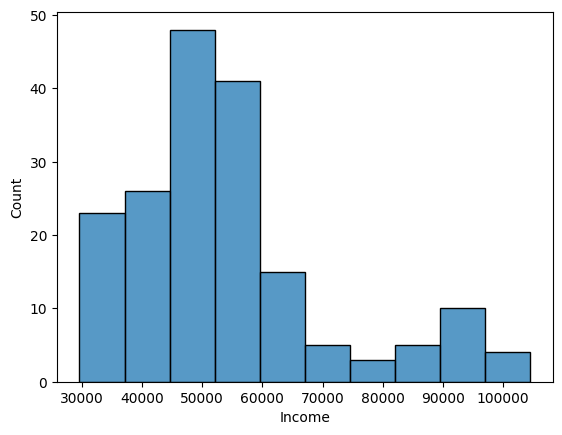

In [108]:
sns.histplot(data= data ,x = data["Income"], bins = 10)

In [109]:
dataC["Income"] = pd.cut(data["Income"],bins=[25000,45000,70000,90000,110000],labels=["low","Medium","High","Very High"],right = True)

<Axes: xlabel='Income', ylabel='Density'>

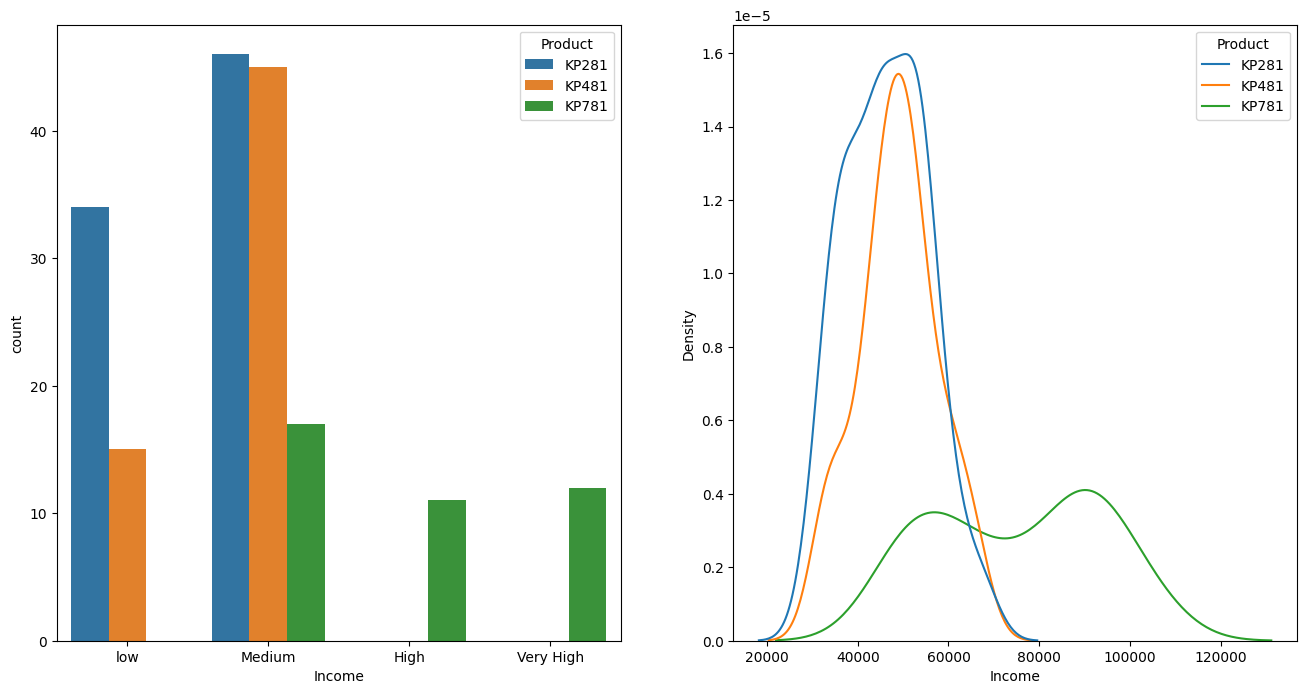

In [110]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Income",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income",hue="Product")

<Axes: xlabel='Miles', ylabel='Count'>

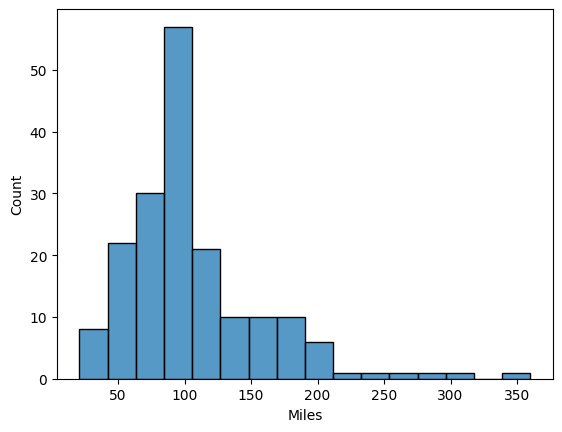

In [111]:
sns.histplot(data["Miles"], bins = 16)

In [112]:
dataC["Miles"] = pd.cut(data["Miles"],bins=[0,75,150,225,375],labels=["low","Medium","High","Very High"],right = True)

<Axes: xlabel='Miles', ylabel='Density'>

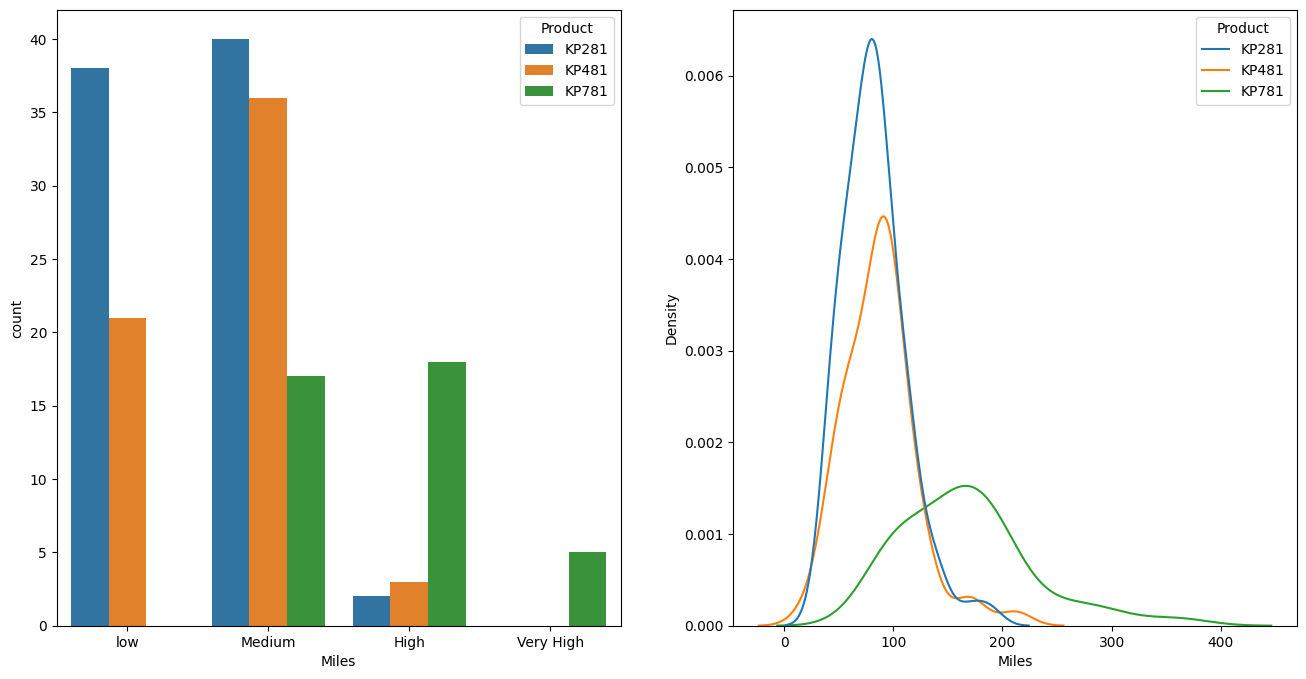

In [113]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Miles",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Miles",hue="Product")

In [114]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    category
 2   Gender         180 non-null    object  
 3   Education      180 non-null    category
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    category
 8   Miles          180 non-null    category
dtypes: category(4), int64(2), object(3)
memory usage: 8.7+ KB


In [115]:
print ("Category : Nunique , Max , Min")
print("-------------------------------")
for i in dataC.columns:
  print(i, ":", dataC[i].nunique(),",", dataC[i].max(),",",dataC[i].min())

Category : Nunique , Max , Min
-------------------------------
Product : 3 , KP781 , KP281
Age : 4 , Fourties , Tens
Gender : 2 , Male , Female
Education : 5 , 5 , 1
MaritalStatus : 2 , Single , Partnered
Usage : 6 , 7 , 2
Fitness : 5 , 5 , 1
Income : 4 , Very High , low
Miles : 4 , Very High , low


In [116]:
datakp781=data[data["Product"] == "KP781"]
datakp481=data[data["Product"] == "KP481"]
datakp281=data[data["Product"] == "KP281"]

In [117]:
datakp781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [118]:
datakp781.describe(include = object)

,Product,Gender,MaritalStatus
count,40,40,40
unique,1,2,2
top,KP781,Male,Partnered
freq,40,33,23


<Axes: xlabel='Miles', ylabel='Education'>

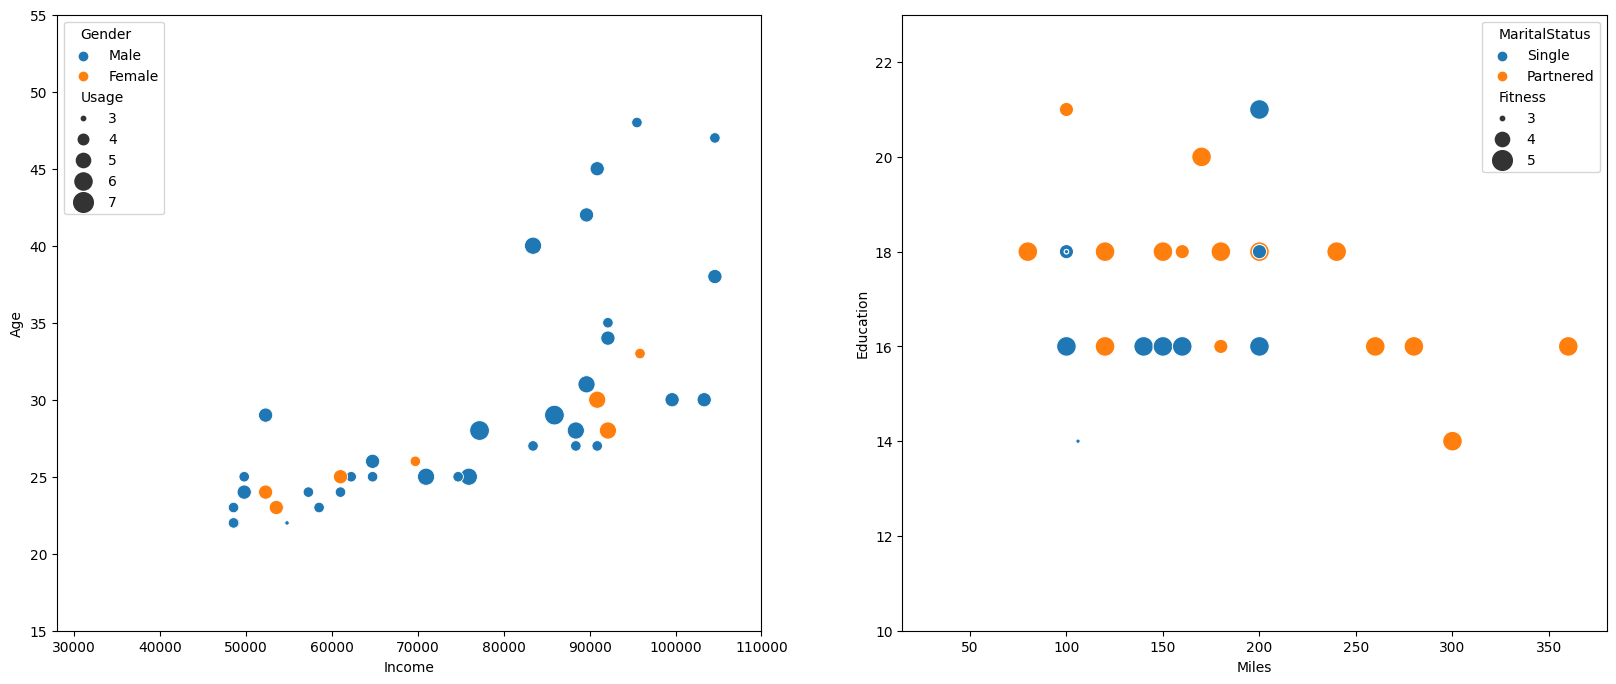

In [119]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp781,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp781,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

In [120]:
datakp481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [121]:
datakp481.describe(include = object)

,Product,Gender,MaritalStatus
count,60,60,60
unique,1,2,2
top,KP481,Male,Partnered
freq,60,31,36


<Axes: xlabel='Miles', ylabel='Education'>

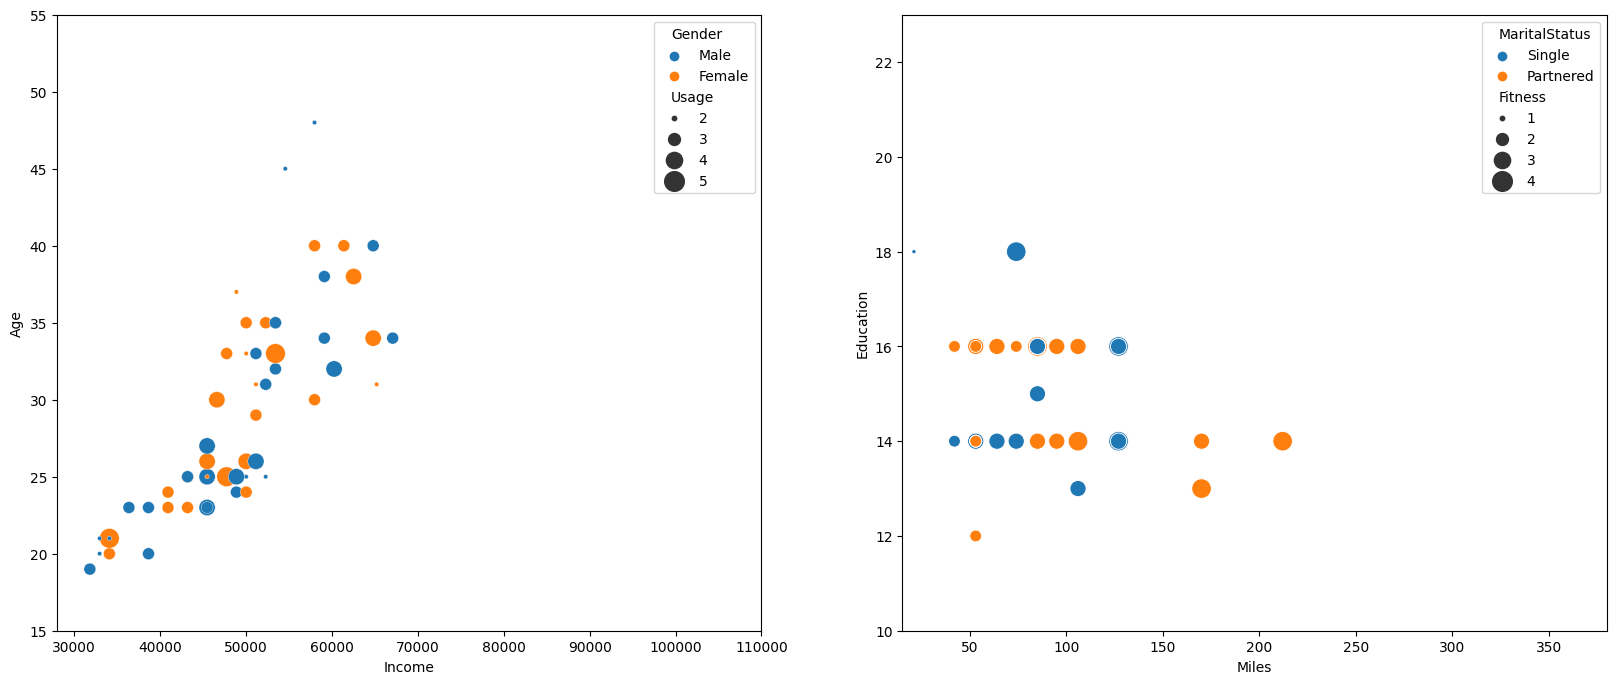

In [122]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp481,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp481,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

In [123]:
datakp281.describe(include = object)

,Product,Gender,MaritalStatus
count,80,80,80
unique,1,2,2
top,KP281,Male,Partnered
freq,80,40,48


In [124]:
datakp281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


<Axes: xlabel='Miles', ylabel='Education'>

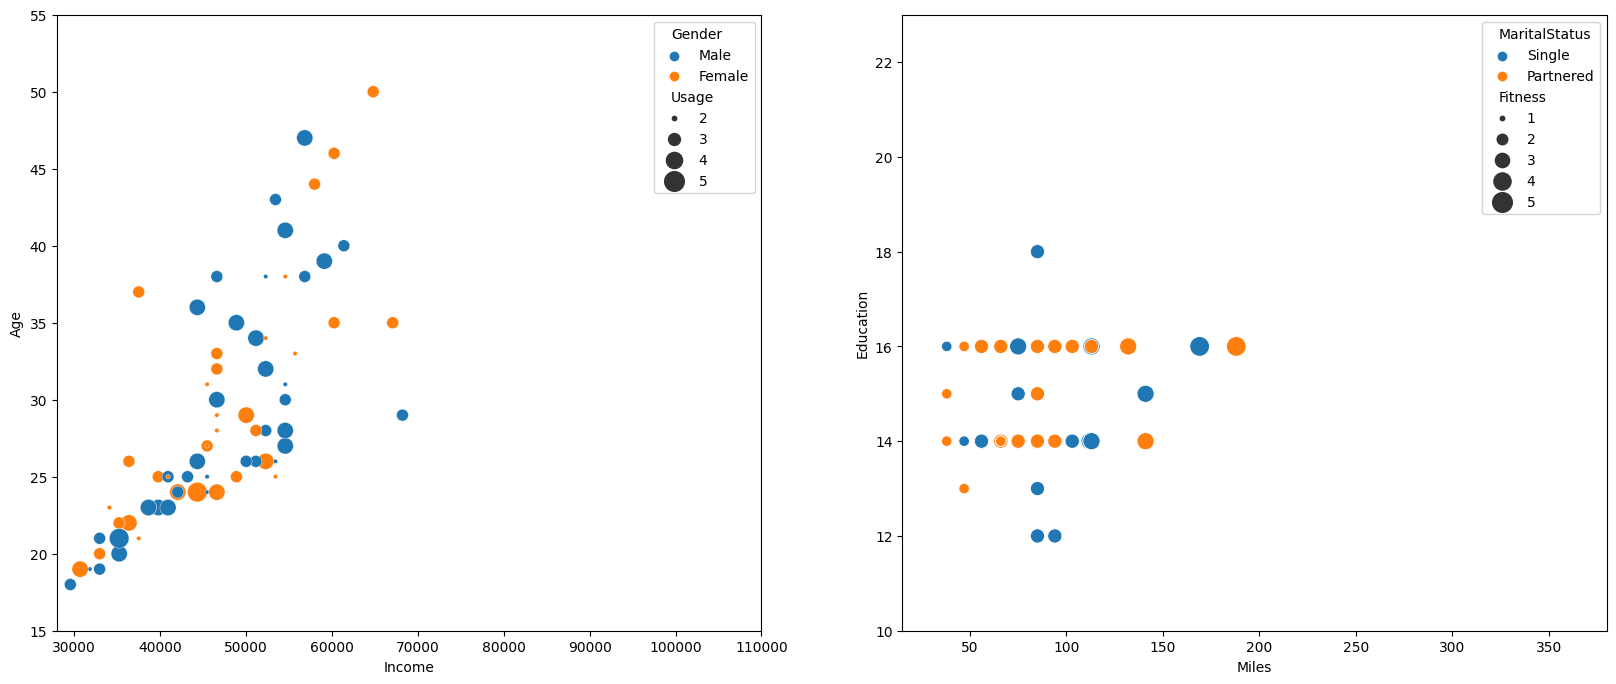

In [125]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp281,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp281,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

In [126]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [127]:
pd.pivot_table(data=data, columns = "Product",index = ["Gender","MaritalStatus"],aggfunc="mean",margins = True)

Age                                   Education  \
Product                   KP281      KP481      KP781        All      KP281   
Gender MaritalStatus                                                          
Female Partnered      28.333333  30.000000  29.000000  28.934783  14.888889   
       Single         28.692308  28.142857  24.333333  28.000000  15.538462   
Male   Partnered      31.380952  30.380952  30.000000  30.606557  15.428571   
       Single         25.631579  25.200000  28.928571  26.604651  14.473684   
All                   28.550000  28.900000  29.100000  28.788889  15.037500   

                                                        Fitness            \
Product                   KP481      KP781        All     KP281     KP481   
Gender MaritalStatus                                                        
Female Partnered      15.200000  17.500000  15.217391  2.851852  2.933333   
       Single         15.214286  18.333333  15.666667  2.923077  2.785714   
Male   Partnered      15.285714  17.421053  16.000000  2.857143  2.904762   
       Single         14.500000  16.928571  15.279070  3.263158  3.000000   
All                   15.116667  17.325000  15.572222  2.962500  2.900000   

                      ...        Income                    Miles             \
Product               ...         KP781           All      KP281      KP481   
Gender MaritalStatus  ...                                                     
Female Partnered      ...  84972.250000  50693.760870  74.925926  94.000000   
       Single         ...  58516.000000  48502.800000  78.846154  80.214286   
Male   Partnered      ...  81431.368421  59585.704918  80.190476  87.238095   
       Single         ...  68216.428571  52274.395349  99.526316  91.100000   
All                   ...  75441.575000  53719.577778  82.787500  87.933333   

                                                 Usage                      \
Product                    KP781         All     KP281     KP481     KP781   
Gender MaritalStatus                                                         
Female Partnered      215.000000   93.326087  2.851852  3.333333  5.250000   
       Single         133.333333   84.933333  3.000000  2.928571  4.666667   
Male   Partnered      176.315789  112.557377  3.285714  2.857143  4.842105   
       Single         147.571429  113.209302  3.263158  3.300000  4.571429   
All                   166.900000  103.194444  3.087500  3.066667  4.775000   

                                
Product                    All  
Gender MaritalStatus            
Female Partnered      3.217391  
       Single         3.133333  
Male   Partnered      3.622951  
       Single         3.697674  
All                   3.455556  

[5 rows x 24 columns]

In [128]:
Z = pd.crosstab([data["Gender"],data["MaritalStatus"]],data["Product"],margins = True, normalize = True)

<Axes: xlabel='Product', ylabel='Gender-MaritalStatus'>

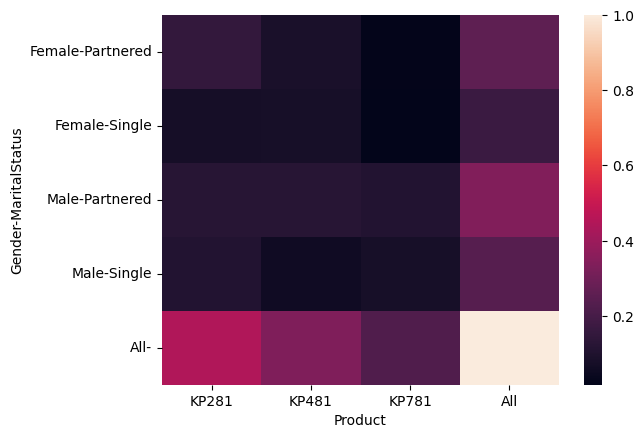

In [129]:
sns.heatmap(data = Z)

In [130]:
Z

Product                  KP281     KP481     KP781       All
Gender MaritalStatus                                        
Female Partnered      0.150000  0.083333  0.022222  0.255556
       Single         0.072222  0.077778  0.016667  0.166667
Male   Partnered      0.116667  0.116667  0.105556  0.338889
       Single         0.105556  0.055556  0.077778  0.238889
All                   0.444444  0.333333  0.222222  1.000000

In [131]:
D = pd.crosstab(data["Product"],data["Gender"])
DN  = pd.crosstab(data["Product"],data["Gender"],normalize = True)

In [132]:
D

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [133]:
DN

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


<Axes: xlabel='Gender', ylabel='Product'>

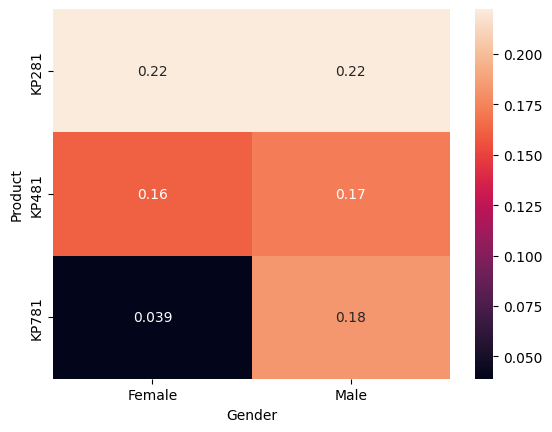

In [134]:
sns.heatmap(data=DN,annot=True)

In [135]:
DN = pd.crosstab(data["Product"],data["Gender"],normalize ="index")
D = pd.crosstab(data["Product"],data["Gender"])

In [136]:
D

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [137]:
DN

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


In [138]:
D.index

Index(['KP281', 'KP481', 'KP781'], dtype='object', name='Product')

In [139]:
D.columns

Index(['Female', 'Male'], dtype='object', name='Gender')

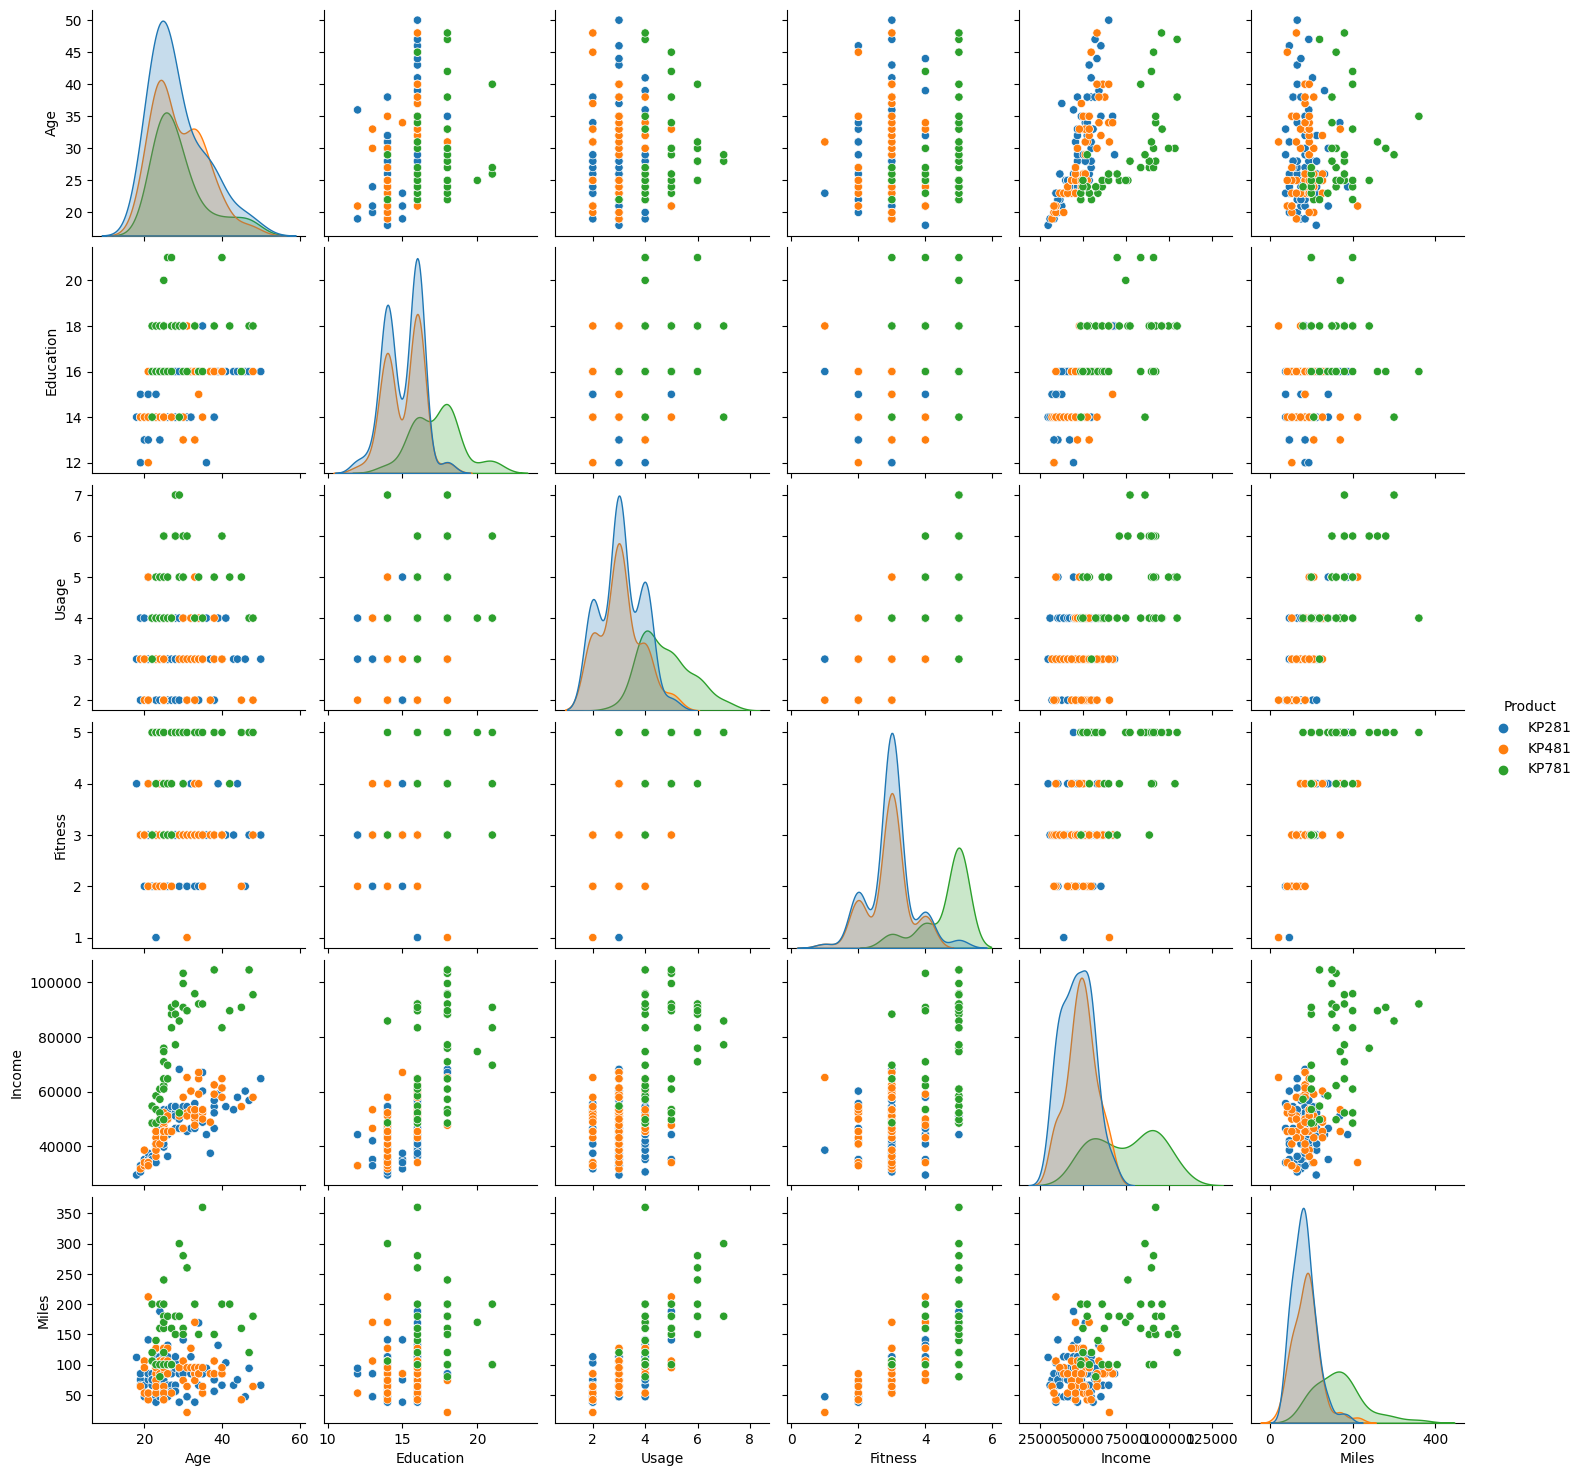

In [144]:
sns.pairplot(data,hue="Product")

****Calculating all Marginal & Conditional propobilities with Heatmaps ****

*************************************************
Unique Value Counts of Product Feature
*************************************************
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
*************************************************
Marginal Propabilities of each value in Product Feature
*************************************************
P( KP281 ) = 0.44
P( KP481 ) = 0.33
P( KP781 ) = 0.22
*************************************************

----------------------------------------------------------------------------------------------------------
Unique Value Counts of Age Feature
*************************************************
Twenties    110
Thirties     48
Fourties     12
Tens         10
Name: Age, dtype: int64
*************************************************
Marginal Propabilities of each value in Age Feature
*************************************************
P( Twenties ) = 0.61
P( Thi

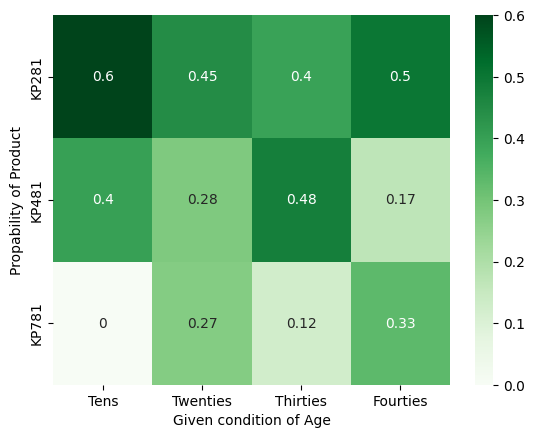


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Gender Feature
*************************************************
Male      104
Female     76
Name: Gender, dtype: int64
*************************************************
Marginal Propabilities of each value in Gender Feature
*************************************************
P( Male ) = 0.58
P( Female ) = 0.42
*************************************************
2-Way Contigency Table for Features : Product & Gender
*************************************************
Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180
*************************************************
Conditional propability of each Product given condition of Gender
*************************************************
P( KP281 | Female ) = 0.53
P( KP281 | Male ) = 0.38
P( KP481 | Female ) = 0

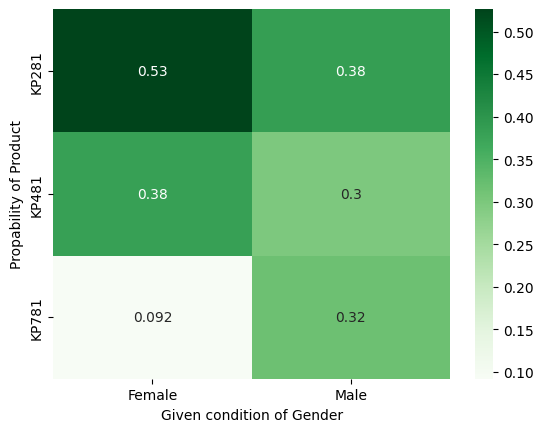


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Education Feature
*************************************************
3    90
2    60
4    23
5     4
1     3
Name: Education, dtype: int64
*************************************************
Marginal Propabilities of each value in Education Feature
*************************************************
P( 3 ) = 0.5
P( 2 ) = 0.33
P( 4 ) = 0.13
P( 5 ) = 0.02
P( 1 ) = 0.02
*************************************************
2-Way Contigency Table for Features : Product & Education
*************************************************
Education  1   2   3   4  5  All
Product                         
KP281      2  33  43   2  0   80
KP481      1  25  32   2  0   60
KP781      0   2  15  19  4   40
All        3  60  90  23  4  180
*************************************************
Conditional propability of each Product given condition of Education
*****************************

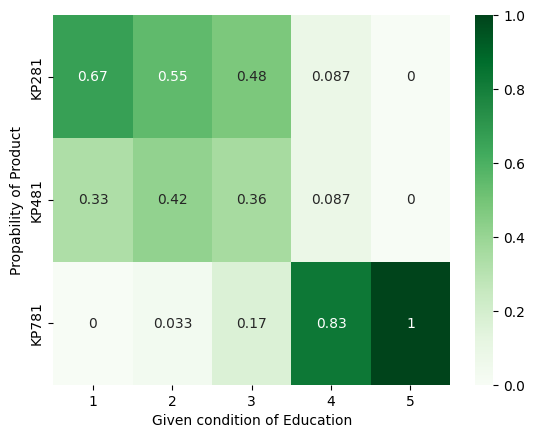


----------------------------------------------------------------------------------------------------------
Unique Value Counts of MaritalStatus Feature
*************************************************
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
*************************************************
Marginal Propabilities of each value in MaritalStatus Feature
*************************************************
P( Partnered ) = 0.59
P( Single ) = 0.41
*************************************************
2-Way Contigency Table for Features : Product & MaritalStatus
*************************************************
MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180
*************************************************
Conditional propability of each Product given condition of MaritalStatus
*************

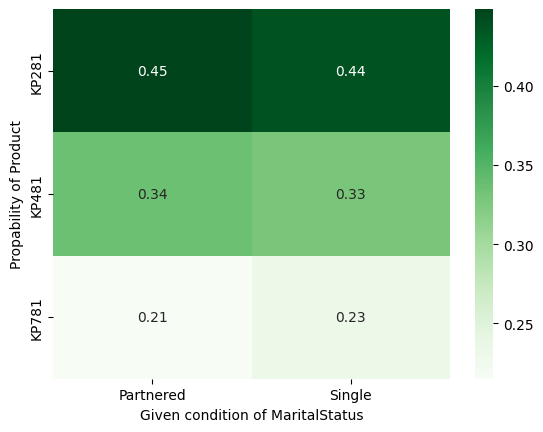


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Usage Feature
*************************************************
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
*************************************************
Marginal Propabilities of each value in Usage Feature
*************************************************
P( 3 ) = 0.38
P( 4 ) = 0.29
P( 2 ) = 0.18
P( 5 ) = 0.09
P( 6 ) = 0.04
P( 7 ) = 0.01
*************************************************
2-Way Contigency Table for Features : Product & Usage
*************************************************
Usage     2   3   4   5  6  7  All
Product                           
KP281    19  37  22   2  0  0   80
KP481    14  31  12   3  0  0   60
KP781     0   1  18  12  7  2   40
All      33  69  52  17  7  2  180
*************************************************
Conditional propability of each Product given condition of Usage
**************

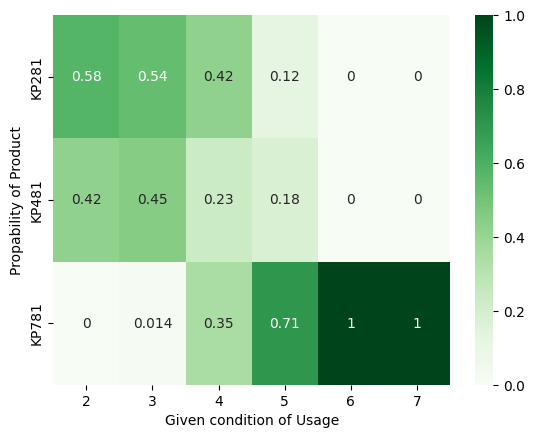


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Fitness Feature
*************************************************
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
*************************************************
Marginal Propabilities of each value in Fitness Feature
*************************************************
P( 3 ) = 0.54
P( 5 ) = 0.17
P( 2 ) = 0.14
P( 4 ) = 0.13
P( 1 ) = 0.01
*************************************************
2-Way Contigency Table for Features : Product & Fitness
*************************************************
Fitness  1   2   3   4   5  All
Product                        
KP281    1  14  54   9   2   80
KP481    1  12  39   8   0   60
KP781    0   0   4   7  29   40
All      2  26  97  24  31  180
*************************************************
Conditional propability of each Product given condition of Fitness
********************************************

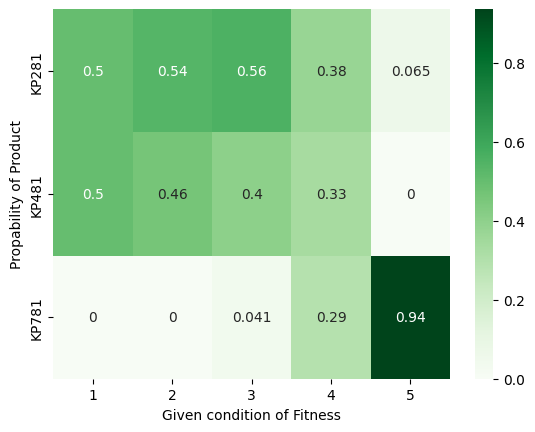


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Income Feature
*************************************************
Medium       108
low           49
Very High     12
High          11
Name: Income, dtype: int64
*************************************************
Marginal Propabilities of each value in Income Feature
*************************************************
P( Medium ) = 0.6
P( low ) = 0.27
P( Very High ) = 0.07
P( High ) = 0.06
*************************************************
2-Way Contigency Table for Features : Product & Income
*************************************************
Income   low  Medium  High  Very High  All
Product                                   
KP281     34      46     0          0   80
KP481     15      45     0          0   60
KP781      0      17    11         12   40
All       49     108    11         12  180
*************************************************
Conditional propab

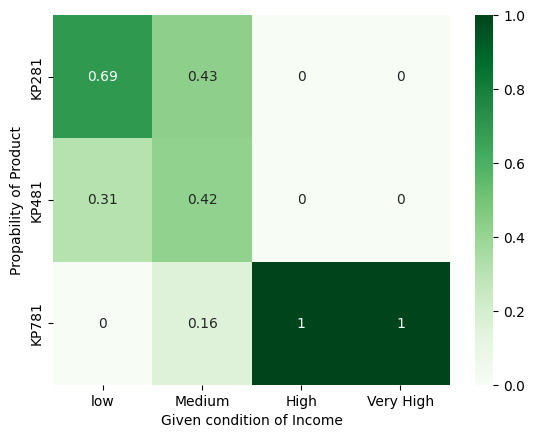


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Miles Feature
*************************************************
Medium       93
low          59
High         23
Very High     5
Name: Miles, dtype: int64
*************************************************
Marginal Propabilities of each value in Miles Feature
*************************************************
P( Medium ) = 0.52
P( low ) = 0.33
P( High ) = 0.13
P( Very High ) = 0.03
*************************************************
2-Way Contigency Table for Features : Product & Miles
*************************************************
Miles    low  Medium  High  Very High  All
Product                                   
KP281     38      40     2          0   80
KP481     21      36     3          0   60
KP781      0      17    18          5   40
All       59      93    23          5  180
*************************************************
Conditional propability o

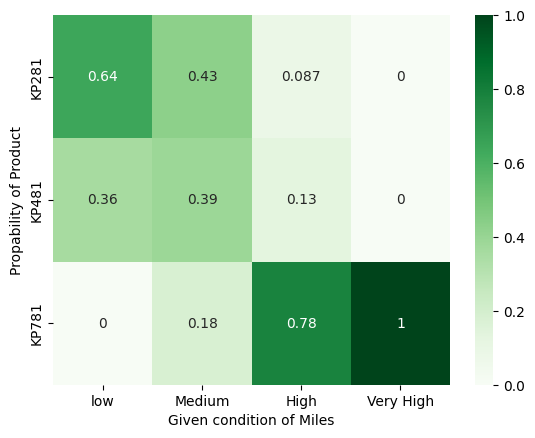


----------------------------------------------------------------------------------------------------------


In [152]:
print("****Calculating all Marginal & Conditional propobilities with Heatmaps ****")
print()
print("*************************************************")
for k in dataC.columns:
  print("Unique Value Counts of",k,"Feature")
  print("*************************************************")
  C = dataC[k].value_counts()
  print(C)
  print("*************************************************")
  print("Marginal Propabilities of each value in",k,"Feature")
  print("*************************************************")
  for j in C.index:
    print("P(",j,") =",round(C[j]/180, 2) )
  print("*************************************************")
  if k != "Product":
    print("2-Way Contigency Table for Features : Product &", k)
    print("*************************************************")
    D = pd.crosstab(dataC["Product"],dataC[k],margins = True)
    DN = pd.crosstab(dataC["Product"],dataC[k],normalize ="columns" )
    print(D)
    print("*************************************************")
    print("Conditional propability of each Product given condition of",k)
    print("*************************************************")
    for i in D.index[-2::-1][::-1]:
      for j in D.columns[-2::-1][::-1]:
        print("P(",i,"|",j,") =",round(D.loc[i][j]/D.loc["All"][j],2))
    print("***********************************************")
    print("Conditional propability Heatmap of each Product given condition of",k)
    print("*************************************************")
    #plt.figure(figsize = (data[k].nunique()*2,6))
    sns.heatmap(data=DN,annot=True,cmap = "Greens")
    plt.ylabel("Propability of Product")
    plt.xlabel("Given condition of "+k)
    plt.show()
    print()
    print("----------------------------------------------------------------------------------------------------------")
  else:
    print()
    print("----------------------------------------------------------------------------------------------------------")

In [143]:
print(data.columns)
print("Enter propoability Column then Conditional column with space")
#A = input()
#B = A.split(" ")
#C = pd.crosstab(data[B[0]],data[B[1]])

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')
Enter propoability Column then Conditional column with space


In [ ]:
plt.colormaps()